# Load Data

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from pandas import read_csv
filename = 'Heart.csv'
data_heart = read_csv(filename)
data_heart.shape

(303, 14)

In [263]:
data_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [264]:
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [265]:
n_miss=data_heart.isnull().sum()        
for col in range(data_heart.shape[1]):       
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.


# Descriptive statistics

In [266]:
description = data_heart.describe()
description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Correlation

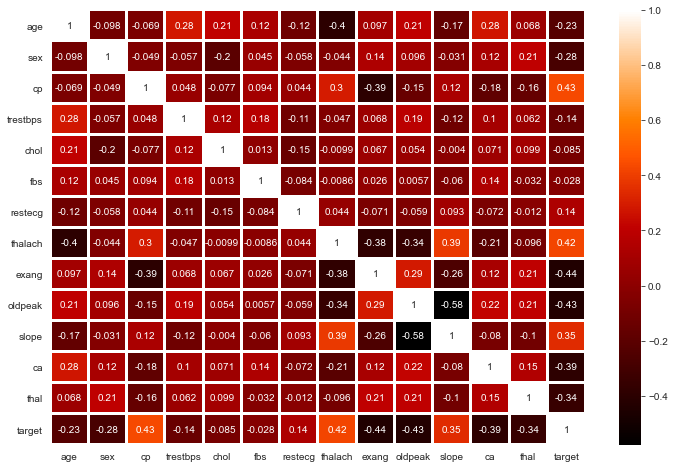

In [267]:
import seaborn as sns

plt.figure(figsize=(12,8)) 
sns.heatmap(data_heart.corr(), annot=True, cmap='gist_heat', linewidths = 2)
plt.show()

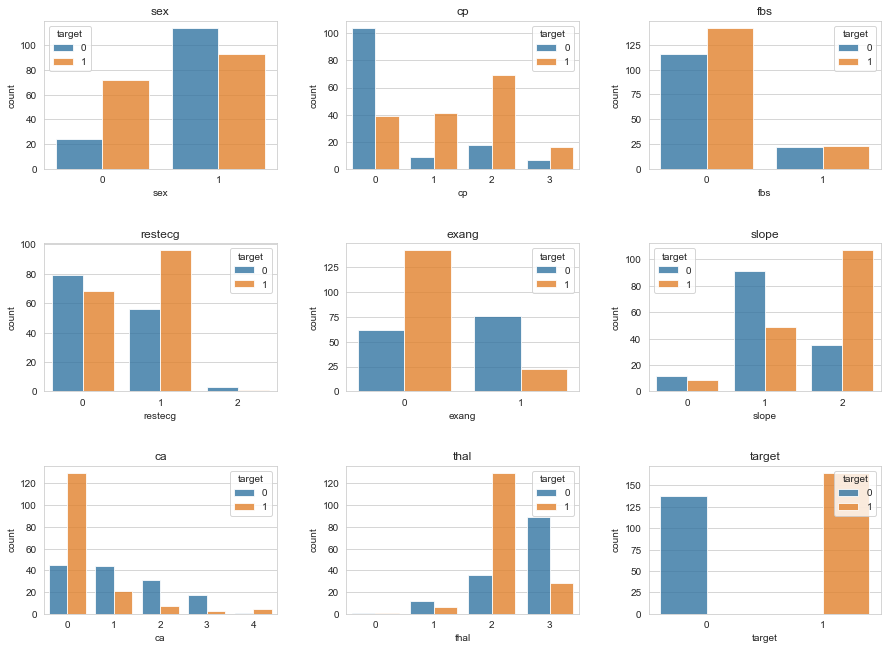

In [268]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cat_feat):
    plt.subplot(4, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=data_heart, x=col, hue='target', alpha=0.8, linewidth=1)

Text(0.5, 1.0, 'Blood pressure (mm/Hg)')

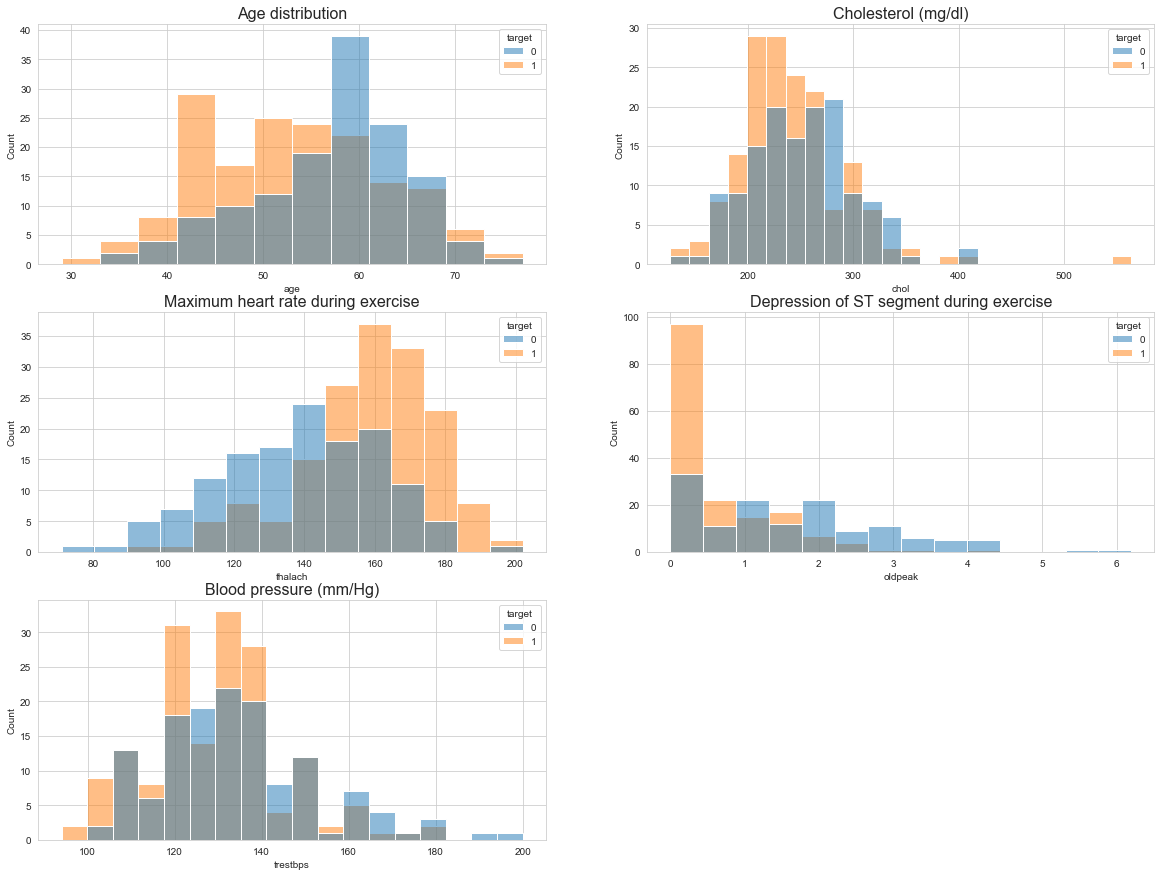

In [269]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.histplot(data=data_heart, x="age", hue="target")
plt.title('Age distribution', size=16)
plt.subplot(3,2,2)
sns.histplot(data=data_heart, x="chol", hue="target")
plt.title('Cholesterol (mg/dl)', size=16)
plt.subplot(3,2,3)
sns.histplot(data=data_heart, x="thalach", hue="target")
plt.title('Maximum heart rate during exercise', size=16)
plt.subplot(3,2,4)
sns.histplot(data=data_heart, x="oldpeak", hue="target")
plt.title('Depression of ST segment during exercise', size=16)
plt.subplot(3,2,5)
sns.histplot(data=data_heart, x="trestbps", hue="target",)
plt.title('Blood pressure (mm/Hg)', size=16)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

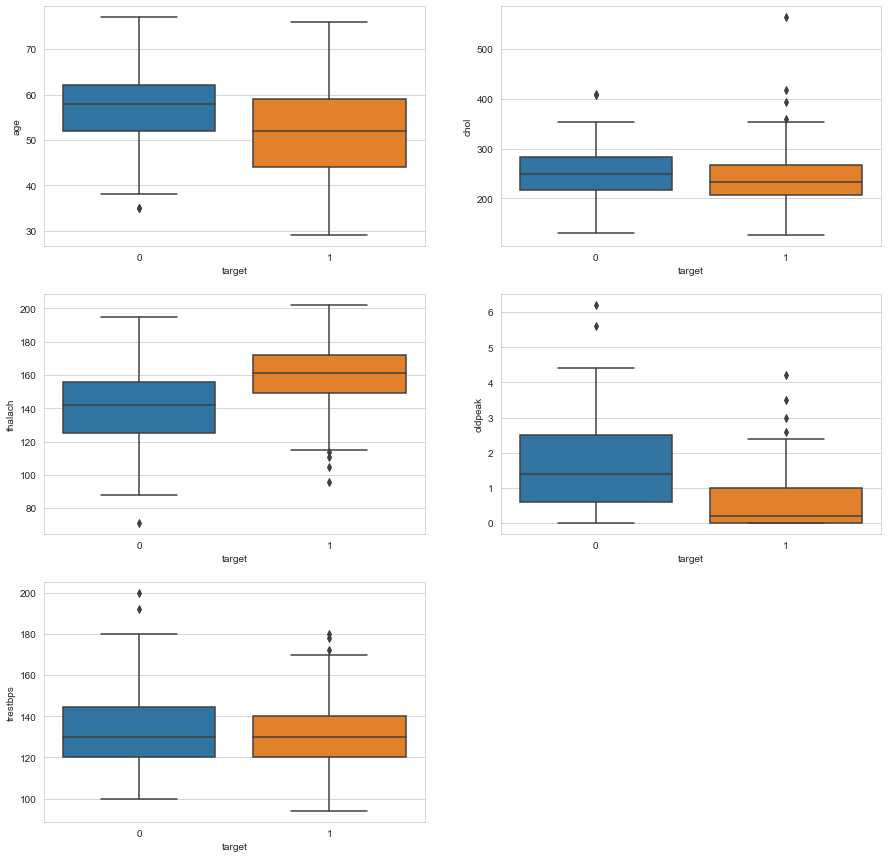

In [270]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(data=data_heart, x="target", y="age")

plt.subplot(3,2,2)
sns.boxplot(data=data_heart, x="target", y="chol")

plt.subplot(3,2,3)
sns.boxplot(data=data_heart, x="target", y="thalach")

plt.subplot(3,2,4)
sns.boxplot(data=data_heart, x="target", y="oldpeak")

plt.subplot(3,2,5)
sns.boxplot(data=data_heart, x="target", y="trestbps")

Text(0.5, 1.0, 'Percentage of target')

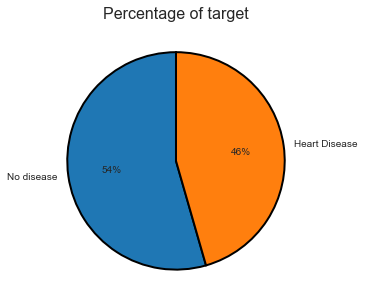

In [271]:
plt.figure(figsize=(5, 5))
plt.pie(data_heart["target"].value_counts(),
        labels = ["No disease", "Heart Disease"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);
plt.title('Percentage of target', size=16)

# Pre-process

In [272]:
last_column = len(data_heart.columns) - 1
y=data_heart.iloc[:,last_column]
X=data_heart.drop(data_heart.columns[-1],axis=1)
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (242, 13) (242,)
shape of X and y respectively (test) : (61, 13) (61,)


In [274]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification models without parameter tuning 

### Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(random_state=42, max_features='auto')
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[24  5]
 [ 5 27]]
-------------------------------------------
Accuracy of Random Forest: 83.60655737704919 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Logistic regression

In [276]:
from sklearn.linear_model import LogisticRegression

model_lgr = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[25  4]
 [ 5 27]]
-------------------------------------------
Accuracy of Logistic Regression: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Decision trees

In [277]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[26  3]
 [ 8 24]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 81.9672131147541 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### SVM

In [278]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2, random_state=42)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[26  3]
 [ 6 26]]
-------------------------------------------
Accuracy of Support Vector Classifier: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# Model visualization without parameter tuning

<AxesSubplot:title={'center':'Heart Disease --- Model: Support Vector Classifier --- Accuracy:0.85246'}>

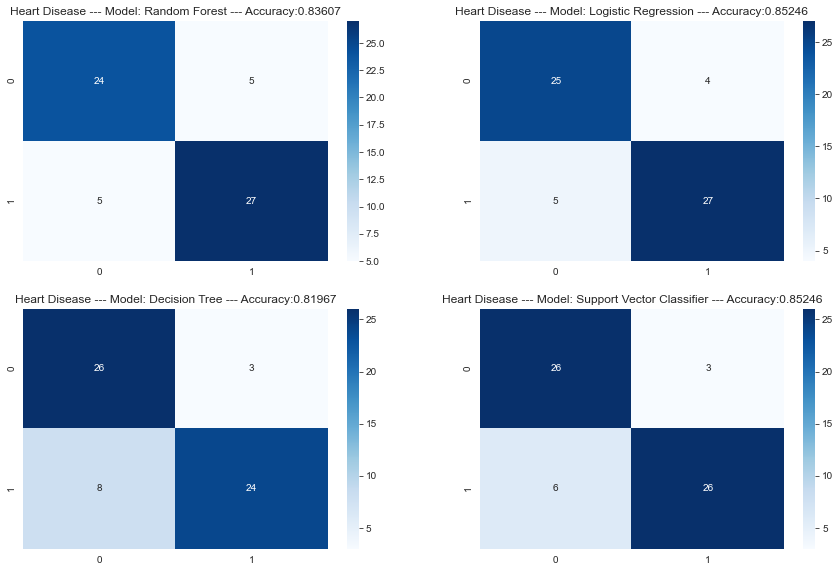

In [279]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,2)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,3)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=dt_acc_score))
sns.heatmap(dt_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,4)
plt.title('Heart Disease --- Model: Support Vector Classifier --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

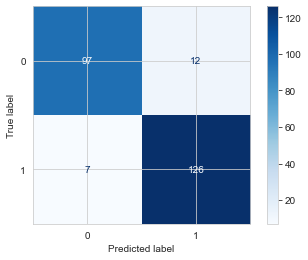

In [280]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

y_pred_train = svm_clf.predict(X_train)
y_pred_test = svm_clf.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_train, y_train, cmap=plt.cm.Blues) 
plt.show()

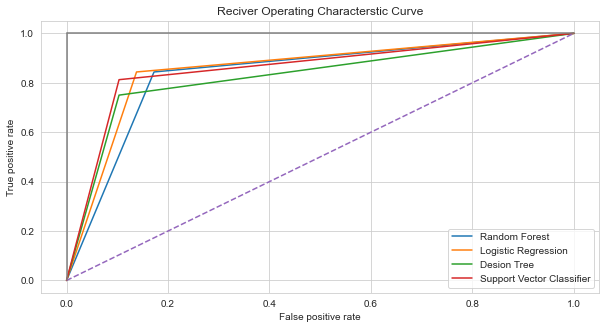

In [281]:
from sklearn.metrics import roc_curve

rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted) 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [282]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Logistic Regression','Decision Tree','Support Vector Machine'], 
                         'Accuracy': [rf_acc_score*100,lr_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Random Forest,83.606557
1,Logistic Regression,85.245902
2,Decision Tree,81.967213
3,Support Vector Machine,85.245902


In [283]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test,rf_predicted)
auc_lr = roc_auc_score(y_test,lr_predict)
auc_dt = roc_auc_score(y_test,dt_predicted)
auc_svc = roc_auc_score(y_test,svc_predicted)

print("AUC RF: {}".format(auc_rf))
print("AUC LR: {}".format(auc_lr))
print("AUC DT: {}".format(auc_dt))
print("AUC SM: {}".format(auc_svc))

AUC RF: 0.8356681034482758
AUC LR: 0.8529094827586207
AUC DT: 0.8232758620689656
AUC SM: 0.8545258620689655


# Classification models with parameter tuning

### Random forest

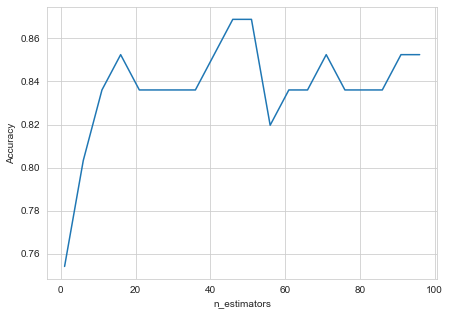

In [284]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

estimator_range = range(1, 100, 5)

train_score = []
test_score = []

rf_class = RandomForestClassifier(max_features='auto',warm_start=True, random_state=42)
for estimator in estimator_range:
    rf_class.n_estimators = estimator
    rf_class.fit(X_train,y_train)
    train_score.append(rf_class.score(X_train,y_train))
    test_score.append(rf_class.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(estimator_range,test_score)
#plt.plot(estimator_range,train_score)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [285]:
err, num_est = sorted(zip(test_score, estimator_range))[-1]
print('Accuracy is {} and its corresponding number of estimators is {}.'.format(err, num_est))

Accuracy is 0.8688524590163934 and its corresponding number of estimators is 51.


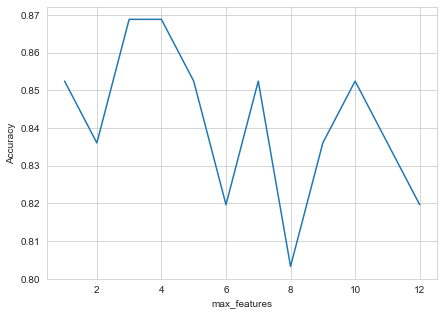

In [286]:
feature_range = range(1, X_train.shape[1])
train_score_feat = []
test_score_feat = []
oob_score = []
for feature in feature_range:
    rf_class = RandomForestClassifier(n_estimators=num_est,max_features=feature,oob_score=True, random_state=42)
    rf_class.fit(X_train,y_train)
    train_score_feat.append(rf_class.score(X_train,y_train))
    test_score_feat.append(rf_class.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(feature_range,test_score_feat)
#plt.plot(feature_range,train_score_feat)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [287]:
err_feat, max_feat= sorted(zip(test_score_feat, feature_range))[-1]
print('Accuracy is {} and its corresponding maximum number of features is {}.'.format(err_feat, max_feat))

Accuracy is 0.8688524590163934 and its corresponding maximum number of features is 4.


In [288]:
rf = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=51, random_state=42)

In [289]:
feature_cols = X.columns
feat_imp = pd.DataFrame({'feature':feature_cols, 'importance':rf_class.feature_importances_}).sort_values('importance', ascending=False)
feat_imp

,feature,importance
2,cp,0.169221
11,ca,0.151316
9,oldpeak,0.122537
12,thal,0.102514
8,exang,0.077072
7,thalach,0.072818
0,age,0.071005
4,chol,0.069082
3,trestbps,0.063908
10,slope,0.044862


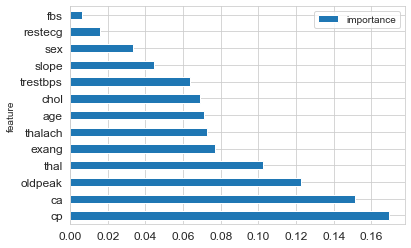

In [290]:
ax=feat_imp.plot.barh(y='importance',x='feature')

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf_predicted = rf.predict(X_test)

output = pd.DataFrame({'Predicted':rf_predicted}) # Heart-Disease yes or no? 1/0
#print(output.head(10))
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
print("\n")

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, random_state=42)
rf.fit(X_train,y_train)
score = rf.score(X_train, y_train)
print('Training Score:', score)
score = rf.score(X_test, y_test)
print('Testing Score:', score)
print("\n")

rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")

print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

% of people predicted with heart-disease: 0.5573770491803278


Training Score: 1.0
Testing Score: 0.8688524590163934


confusion matrix
[[24  5]
 [ 3 29]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [292]:
train_scores = []
test_scores = []
rf = RandomForestClassifier(max_features='auto', warm_start=True, random_state=42)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

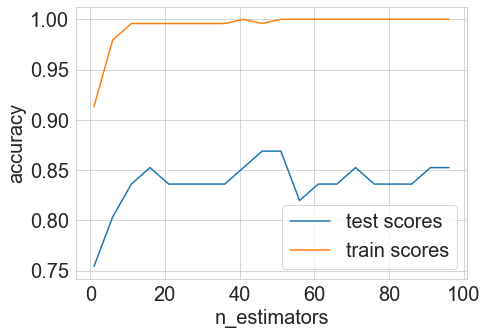

In [293]:
plt.figure(figsize=(7,5))
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy", fontsize=20)
plt.xlabel("n_estimators", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)

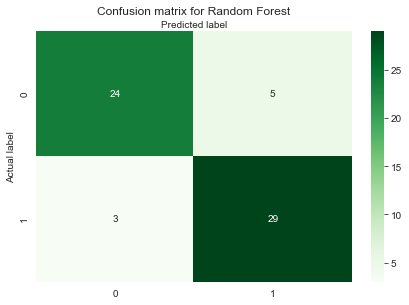

In [294]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_predicted)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

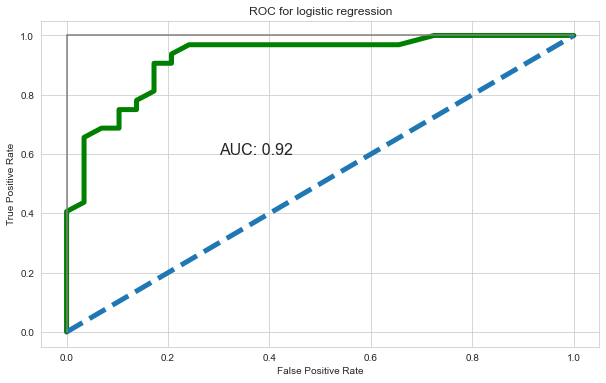

In [295]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.3,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Logistic regression

## Decision trees

## SVM

# Visuals